# Implementation of multi-D Newton's method

In [2]:
import numpy as np

In [6]:

def newton(F,Fprime,x0,tol):
    x = np.array(x0,dtype=float)
    k = 0
    while True:
        Fval = F(x)
        Fprimeval = Fprime(x)
        s = np.linalg.solve(Fprimeval,-Fval)
        x += s
        k += 1
        if np.linalg.norm(s) <= tol: 
            print(f'{k} iterations used')
            return x
    
def myF(x):
    u,v = x
    return np.array([u**3-v, u**2+v**2-1])
    
def myFprime(x):
    u,v = x
    return np.array([[3*u**2, -1],
                     [2*u,   2*v]])
    
x = [2,1]     # initial guess at root
tol = 1e-12

z = newton(myF, myFprime, x, tol )
print('Approximate root is',z)
print('Residual is',myF(z)) # sanity check: should be very small


7 iterations used
Approximate root is [0.82603136 0.56362416]
Residual is [-1.11022302e-16  0.00000000e+00]


### Initial guesses given by Yingkun, Tien, me, and Joel ...

In [7]:
x = [1,0]     # initial guess at root
tol = 1e-12

z = newton(myF, myFprime, x, tol )
print('Approximate root is',z)
print('Residual is',myF(z)) # sanity check: should be very small


7 iterations used
Approximate root is [0.82603136 0.56362416]
Residual is [1.11022302e-16 0.00000000e+00]


In [8]:
x = [1,0.5]     # initial guess at root
tol = 1e-12

z = newton(myF, myFprime, x, tol )
print('Approximate root is',z)
print('Residual is',myF(z)) # sanity check: should be very small


5 iterations used
Approximate root is [0.82603136 0.56362416]
Residual is [ 0.00000000e+00 -2.22044605e-16]


In [9]:
c = np.cos(7/6*np.pi)
s = np.sin(7/6*np.pi)
x = [c,s]     # initial guess at root
tol = 1e-12

z = newton(myF, myFprime, x, tol )
print('Approximate root is',z)
print('Residual is',myF(z)) # sanity check: should be very small


5 iterations used
Approximate root is [-0.82603136 -0.56362416]
Residual is [-1.11022302e-16  0.00000000e+00]


### Below, I've written a more elaborate version that makes a picture of what's happening. 

In [11]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

def newton(F,Fprime,x,tol):
    x = np.array(x,dtype=float)  # floating point copy of x in case it comes in as ints
    while True:
        Fval = F(x)
        Fpval = Fprime(x)
        s = np.linalg.solve(Fpval,-Fval)  # solve for our Newton step
        newx = x + s
        plt.plot([x[0],newx[0]],[x[1],newx[1]],'k',alpha=0.5)
        plt.plot(newx[0],newx[1],'ko',alpha=0.2)
        x = newx
        if np.linalg.norm(s) < tol:
            return x  # done!
        
def myF(x):
    u,v = x
    return np.array([ u**3 -v, u**2 + v**2 - 1 ])

def myFprime(x):
    u,v = x
    return np.array([[ 3*u**2, -1 ],
                     [ 2*u,    2*v]])

def doit(x0,cx,cy,r):
    plt.subplot(111,aspect=1)          

    # draw the curves
    u = np.linspace(-1.5,1.5,400)
    v = u**3
    plt.plot(u,v,'b',lw=3,alpha=0.5)
    t = np.linspace(0,2*np.pi,400)
    x,y = np.cos(t),np.sin(t)
    plt.plot(x,y,'r',lw=3,alpha=0.5)

    x = x0 #[1/2,1/2]
    plt.plot(x[0],x[1],'co')
    z = newton(myF,myFprime,x,1e-12)
    print('Approx root',z)
    # what's the residual at our approx root z?
    print('residual at z:',myF(z))
    #r = 1.5
    plt.xlim(cx-r,cx+r)
    plt.ylim(cy-r,cy+r)
    plt.xlabel('u',fontsize=20)
    plt.ylabel('v',fontsize=20,rotation=0)
    plt.savefig('temp.pdf');  # better render
    return z

Approx root [0.82603136 0.56362416]
residual at z: [-1.11022302e-16  0.00000000e+00]


array([0.82603136, 0.56362416])

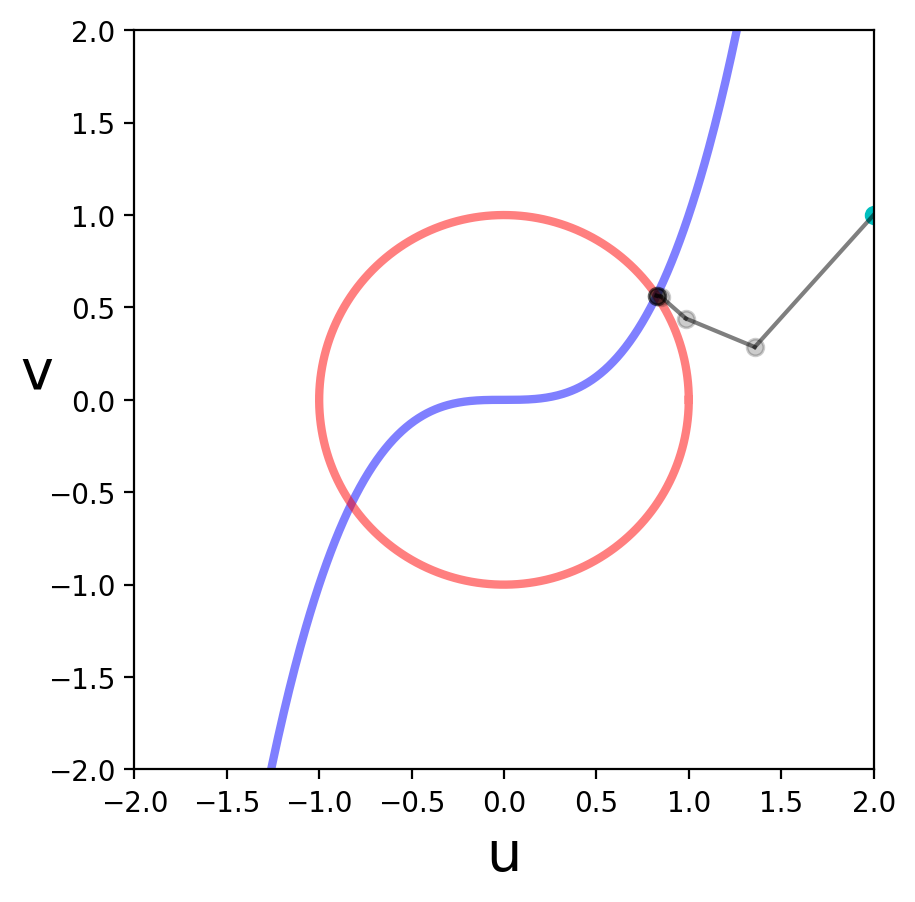

In [13]:
doit([2,1],0,0,2)

Approx root [-0.82603136 -0.56362416]
residual at z: [-1.11022302e-16  0.00000000e+00]


array([-0.82603136, -0.56362416])

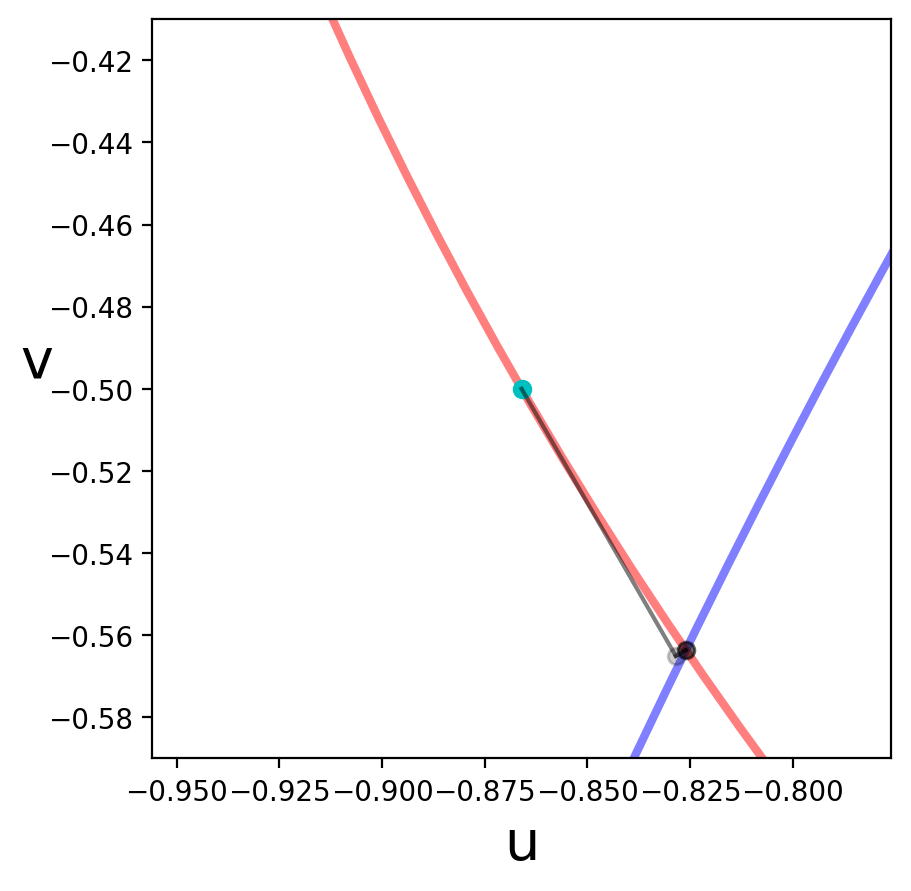

In [16]:
doit([c,s],c,s,.09)

Approx root [-0.82603136 -0.56362416]
residual at z: [-1.11022302e-16  0.00000000e+00]


array([-0.82603136, -0.56362416])

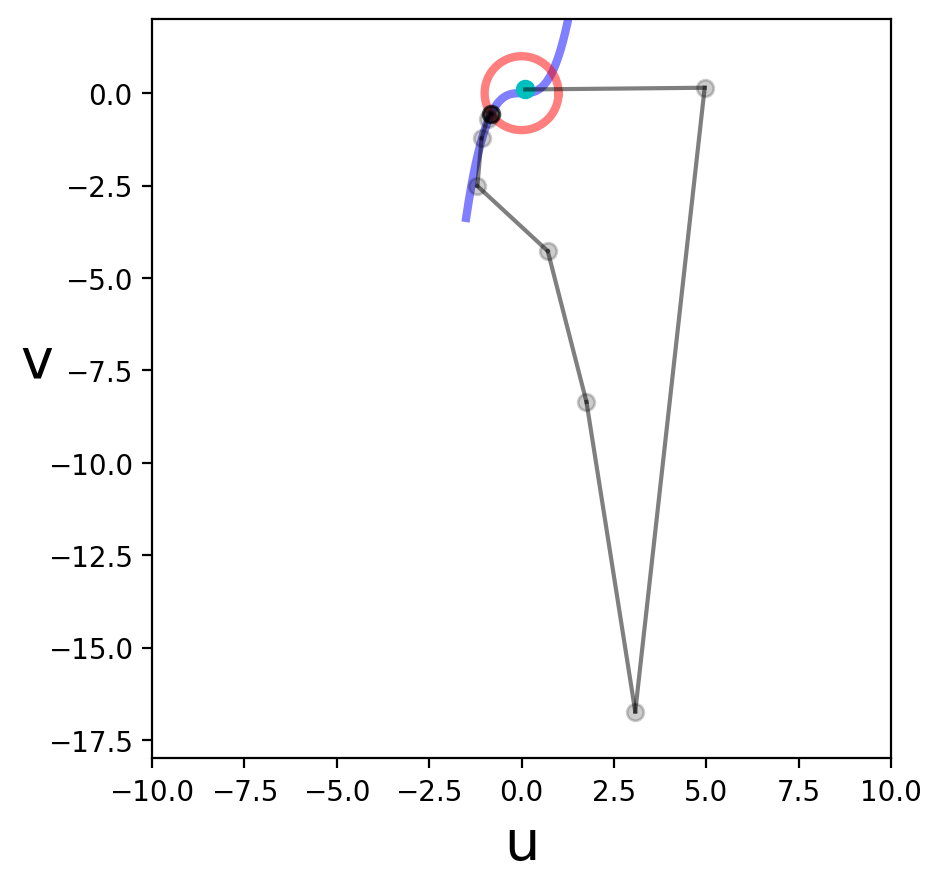

In [21]:
doit([.1,.1],0,-8,10)

# Let's make a picture of which initial guesses lead to which root ...

5 iterations used


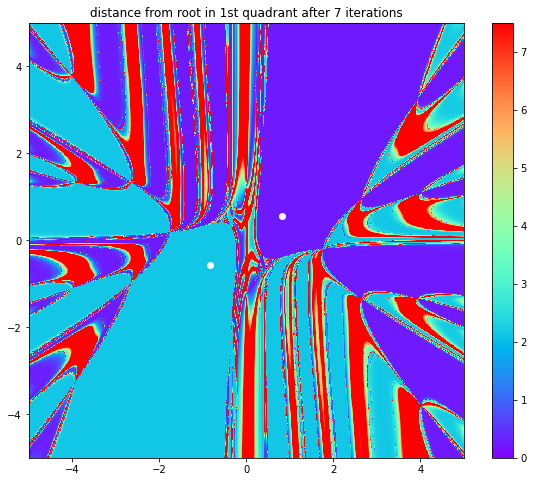

In [77]:
import numpy as np
def newton(F,Fprime,x0,tol,nstepsmax=0):
    x = np.array(x0,dtype=float)
    k = 0
    while True:
        Fval = F(x)
        Fprimeval = Fprime(x)
        #print(Fval.shape)
        #print(Fprimeval.shape)
        if np.isscalar(x[0]):
            s = np.linalg.solve(Fprimeval,-Fval)
        else:
            s = np.linalg.solve(Fprimeval,-Fval).transpose(1,0)
        x += s
        k += 1
        if nstepsmax!=0 and k >= nstepsmax:
            return x
        if np.linalg.norm(s) <= tol: 
            print(f'{k} iterations used')
            return x
    
def myF(x):
    u,v = x
    Fval =  np.array([u**3-v, u**2+v**2-1])
    if np.isscalar(u): return Fval
    else: return Fval.transpose(1,0)
    
def myFprime(x):
    u,v = x
    if np.isscalar(u):  # just doing a single point
        one = 1
        return np.array([[3*u**2, -one],
                         [2*u,     2*v]])
    else: # doing a whole array of points at the same time
        one = np.ones_like(u)
        return np.array([[3*u**2, -one],
                     [2*u,     2*v]]).transpose(2,0,1)
    
# first get the two roots
tol = 1e-12
x = [1,.5]
u1,v1 = newton(myF,myFprime,x,tol) # 1st quadrant root
u3,v3 = -u1,-v1                    # 3rd quadrant root

tol = 1e-6

# make a grid of points
cx,cy,r = 0,0,5
nx,ny = 800,800
x = np.linspace(cx-r,cx+r,nx)
y = np.linspace(cy+r,cy-r,ny)
X,Y = np.meshgrid(x,y)
#print(X)
#print(Y)
X = np.reshape(X,nx*ny)
Y = np.reshape(Y,nx*ny)
#print(X)
#print(Y)
#print(X.reshape(ny,nx))
#print(Y.reshape(ny,nx))

x = [X,Y]
nstepsmax = 7
zu,zv = newton(myF, myFprime, x, tol, nstepsmax )
zu = zu.reshape(ny,nx)
zv = zu.reshape(ny,nx)
dmax = 1.5*r
r1 = np.minimum( np.sqrt( (zu-u1)**2 + (zv-v1)**2 ),dmax)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(r1,interpolation='nearest',cmap='rainbow',vmin=0,vmax=dmax,extent=(cx-r,cx+r,cy-r,cy+r))
plt.colorbar();
plt.plot([u1,u3],[v1,v3],'wo')
plt.title(f'distance from root in 1st quadrant after {nstepsmax} iterations');
plt.savefig('2d_newton_convergence.pdf',bbox_inches='tight')